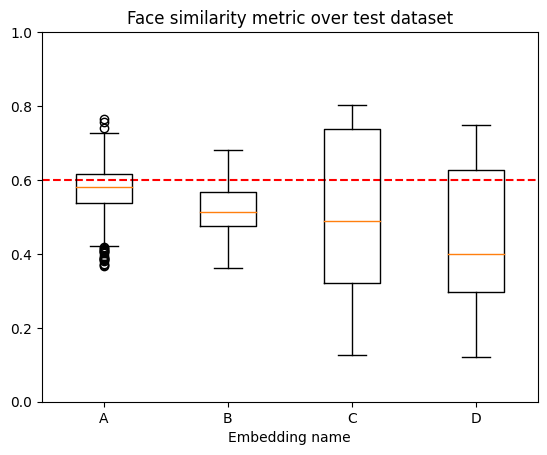

In [4]:
import os
import matplotlib.pyplot as plt
import pandas as pd
embedding_names = ["lucfrncs", "frankfrschlng", "fabhsr", "christphgrmmr"]
df = pd.DataFrame()
labels = ["A", "B", "C", "D"]
for name in embedding_names:
    path = "embedding_datasets/"+name+"/results/transform-all/transform_all.csv"
    if os.path.exists(path):
        inverted_df = pd.read_csv(path, sep=',', header=None)
        inverted_df[1] = inverted_df[1].transform(lambda face_distance: 1-face_distance, axis=0)
        df[name] = inverted_df[1]
    else:
        print(name)        
plt.title("Face similarity metric over test dataset")
plt.ylim(0, 1)
plt.xlabel("Embedding name")
face_distance_threshold = 0.4
face_similarity_threshold = 1 - face_distance_threshold
plt.axhline(face_similarity_threshold, linestyle="--", color="r", label="Face detection threshold")
plt.boxplot(df, labels=labels)
plt.savefig("./plots/transform_all.png")

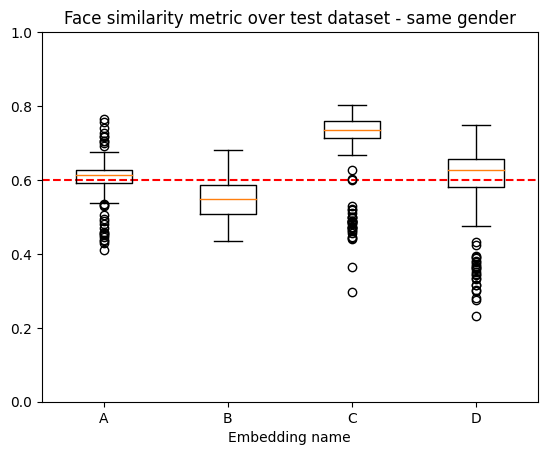

In [5]:
df = pd.DataFrame()
genders = ["/MEN/", "/WOMEN/", "/MEN/", "/MEN/"]
for name, gender in zip(embedding_names, genders):
    path = "embedding_datasets/"+name+"/results/transform-all/transform_all.csv"
    if os.path.exists(path):
        inverted_df = pd.read_csv(path, sep=',', header=None)
        inverted_df = inverted_df[inverted_df[0].str.contains(gender) == True]
        inverted_df[1] = inverted_df[1].transform(lambda face_distance: 1-face_distance, axis=0)
        inverted_df = inverted_df.reset_index()
        df[name] = inverted_df[1]
    else:
        print(name)        
plt.title("Face similarity metric over test dataset - same gender")
plt.ylim(0, 1)
plt.xlabel("Embedding name")
face_distance_threshold = 0.4
face_similarity_threshold = 1 - face_distance_threshold
plt.axhline(face_similarity_threshold, linestyle="--", color="r", label="Face detection threshold")
plt.boxplot(df, labels=labels)
plt.savefig("./plots/transform_all_same_gender.png")

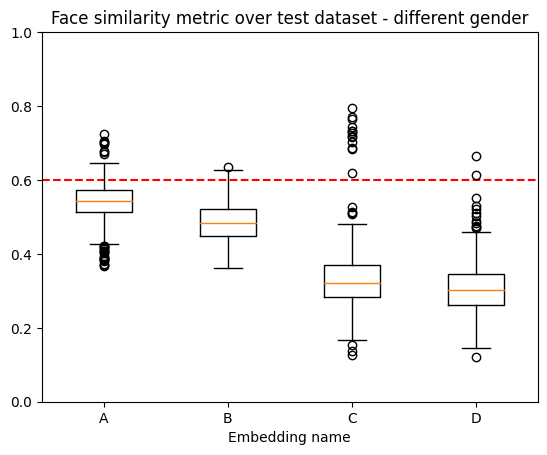

In [6]:
df = pd.DataFrame()
for name, gender in zip(embedding_names, genders):
    path = "embedding_datasets/"+name+"/results/transform-all/transform_all.csv"
    if os.path.exists(path):
        inverted_df = pd.read_csv(path, sep=',', header=None)
        inverted_df = inverted_df[inverted_df[0].str.contains(gender) == False]
        inverted_df[1] = inverted_df[1].transform(lambda face_distance: 1-face_distance, axis=0)
        inverted_df = inverted_df.reset_index()
        df[name] = inverted_df[1]
    else:
        print(name)        
plt.title("Face similarity metric over test dataset - different gender")
plt.ylim(0, 1)
plt.xlabel("Embedding name")
face_distance_threshold = 0.4
face_similarity_threshold = 1 - face_distance_threshold
plt.axhline(face_similarity_threshold, linestyle="--", color="r", label="Face detection threshold")
plt.boxplot(df, labels=labels)
plt.savefig("./plots/transform_all_different_gender.png")